## PCA(Principal Component Analysis)

PCA(Principal Component Analysis)
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화하도록 함
- 그러기 위해서는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원으로 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

예: 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
- 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
- 데이터 변동성이 큰 방향으로 축을 생성하고
- 새롭게 생성된 축으로 데이터를 투영하는 방식

**선형대수 관점에서 PCA 해석**

- 입력 데이터의 공분산 행렬을 고유값 분해하고 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
- 이 고유 벡터가 PCA 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값은 바로 이 고유벡터의 크기를 나타내며 동시에 입력 데이터의 분산을 나타냄

선형변환

- 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
- 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념
- 행렬을 바로 공간으로 가정하는 것

 `분산` : 한 개의 변수의 데이터 변동을 의미
 `공분산` : 두 변수 간의 변동을 의미

PCA 방식 요점
- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며
- 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식

PCA 수행 순서  
(1)  압력 데이터 세트의 공분산 행렬 생성  
(2) 공분산 행렬의 고유벡터와 고유값 계산  
(3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출  
(4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환  

### PCA 예제1

PCA 예제1
- 붓꽃 데이터 세트 사용
- 4개의 속성(피처) : sepal length, sepal width, petal length, petal width
- PCA 사용 차원 축소 : 4개의 속성으리 2개의 PCA 차원으로 압축
- 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 사이킷런 내장 데이터 셋 API 호출
from sklearn.datasets import load_iris

iris = load_iris()
columns = iris.feature_names

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

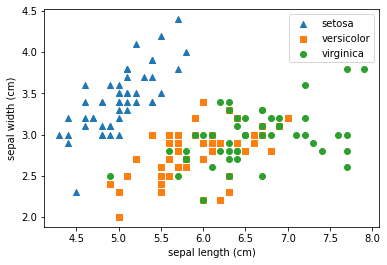

In [9]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']
           
# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target 별로 다른 shape으로 scatter plot

for i, marker in enumerate(markers):
    x = iris_df[iris['target']==i]['sepal length (cm)']
    y = iris_df[iris['target']==i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [24]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

In [25]:
iris_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [26]:
iris_scaled.shape

(150, 4)

**PCA 변환 수행**

스케일링이 적용된 데이터 세트에 PCA 적용
- 4차원(4개의 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런의 PCA 클래스 사용
- n_components 파라미터 : PCA로 변환할 차원의 수
- fit()/transform() 호출해서 PCA 변환 수행

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

# 2차원으로 축소된 것을 확인할 수 있음

(150, 2)

In [28]:
# 넘파이 행렬을 DataFrame로 변환
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns = ['pca_components_1', 'pca_components_2']
iris_pca_df = pd.DataFrame(iris_pca, columns=pca_columns)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,pca_components_1,pca_components_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

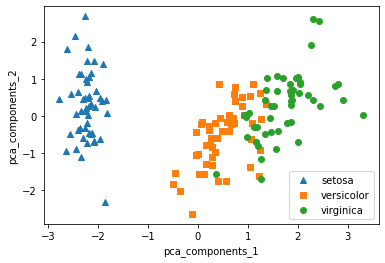

In [31]:
markers = ['^', 's', 'o']
    
for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target']==i]['pca_components_1']
    y = iris_pca_df[iris_pca_df['target']==i]['pca_components_2']
    plt.scatter(x, y, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_components_1')
plt.ylabel('pca_components_2')
plt.show()

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ratio_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [32]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [39]:
# 원본 붓꽃 데이터에 랜덤 포레스트 알고리즘 적용한 결과
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.round(np.mean(scores), 2))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.98]
원본 데이터 평균 정확도: 0.97


In [40]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = iris_pca_df[['pca_components_1', 'pca_components_2']]
scores_pca = cross_val_score(rf_clf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.round(np.mean(scores_pca), 2))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.9 ]
PCA 변환 데이터 평균 정확도: 0.89


### PCA 예제2. 신용카드 데이터 세트 PCA 변환

- 사용 데이터 : 신용카드 고객 데이터 세트 (Credit Card Clients Data Set)

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
Data Folder: default of credit card clients.xls

pca_credit_card.xls로 변경

In [48]:
# 데이터 로드 및 컬럼명 변환
# 엑셀 파일 열고 첫 행과 ID 칼럼 확인
# header로 의미 없는 첫 행 제거, iloc로 첫 번째 칼럼 ID 제거

import pandas as pd

card_df = pd.read_excel('./Datasets/pca_credit_card.xls', sheet_name='Data', header=1).iloc[:, 1:]
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**컬럼명 변경**
- PAY_0 다음에 PAY_2 있으므로 PAY_0을 PAY_1으로 변경
- default payment next month도 default로 변경
default 칼럼을 y_target 변수로 별도 저장
default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성

In [58]:
# 칼럼명 변경
card_df.rename(columns={'PAY_0':'PAY_1', 
                       'default payment next month':'default'}, inplace=True)

# default 칼럼을 y_target 변수로 별도 저장
y = card_df['default']

# default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성
X = card_df.drop('default', axis=1)

In [64]:
# target 값 확인
y.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [60]:
# 23개의 속성
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

[Features Description]

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
-1 = pay duly; 
1 = payment delay for one month; 
2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; 
X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

**피처간 상관도 시각화**

corr() 이용해 각 속성 간의 상관도를 구한 뒤  
heatmap으로 시각화

<AxesSubplot:>

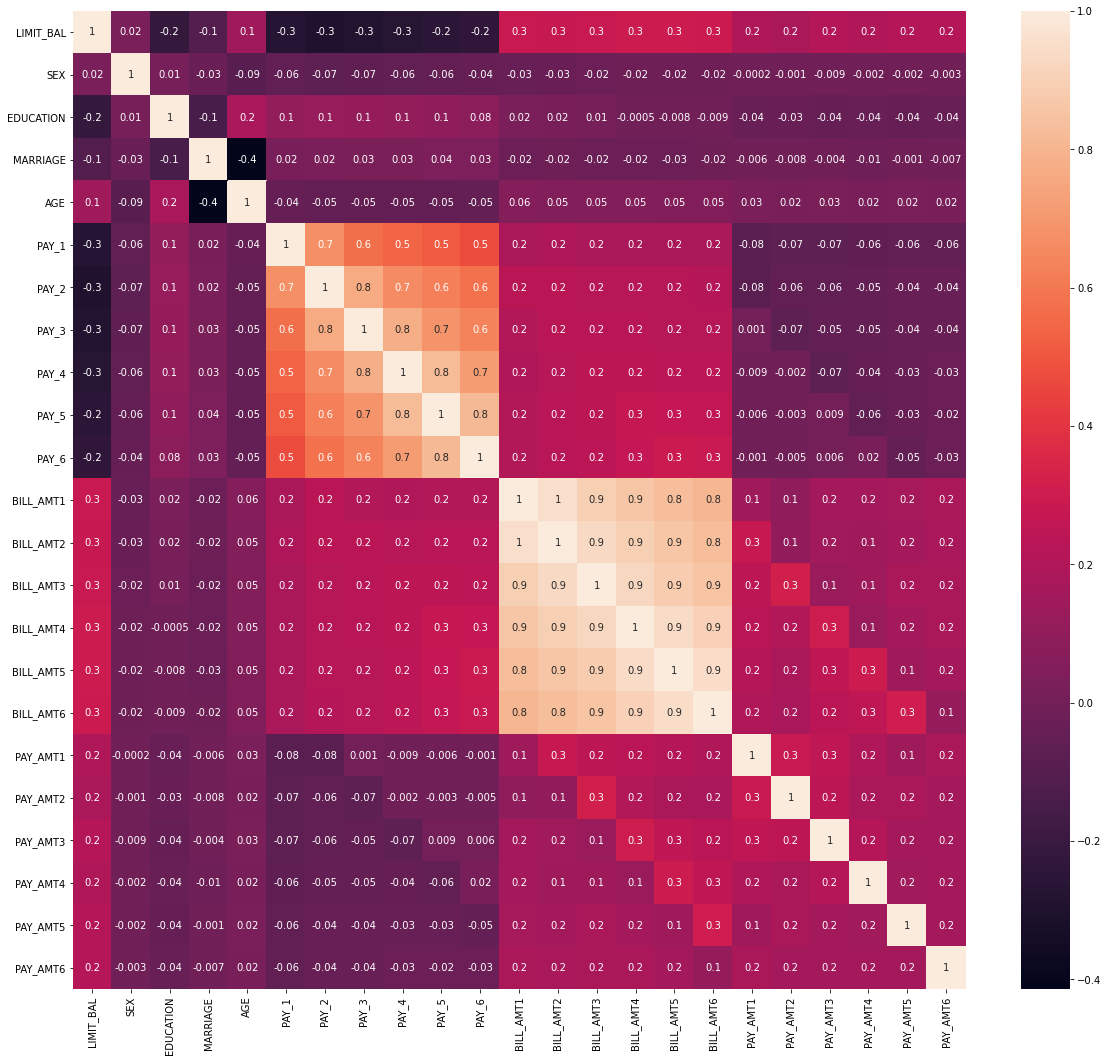

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
corr = X.corr()

sns.heatmap(corr, annot=True, fmt='.1g')

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]

# 2개의 PCA 속성을 가진 PCA 객체 생성하고
scaler = StandardScaler()
col_scaled = scaler.fit_transform(X[cols_bill])
col_scaled.shape

pca = PCA(n_components=2)
pca.fit_transform(col_scaled)

# explained_variance_ratio_ 출력
print('주성분 변동성: ', pca.explained_variance_ratio_)

주성분 변동성:  [0.90555253 0.0509867 ]


**분류 예측 성능 비교**
- 원본 데이터 세트
- 컴포넌트로 PCA 변환한 데이터 세트

In [72]:
# 원본 데이터 세트의 분류 예측 성능 측정
# 랜덤 포레스트 이용
# 3개의 교차 검증 세트

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=3)
print('신용카드 원본 데이터 cv=3인 경우')
print('개별 정확도', np.round(scores, 2))
print('평균 정확도', np.round(np.mean(scores), 2))

신용카드 원본 데이터 cv=3인 경우
개별 정확도 [0.81 0.82 0.82]
평균 정확도 0.82


In [79]:
# 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 성능 측정
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# 6개의 Component를 가진 PCA 변환 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# cross_val_score( )로 분류 예측 수행 
scores_pca = cross_val_score(rf_clf, df_pca, y, scoring='accuracy', cv=3)

print('신용카드 PCA 변환 데이터 cv=3인 경우')
print('개별 정확도', scores_pca)
print('평균 정확도', np.round(np.mean(scores_pca), 2))

신용카드 PCA 변환 데이터 cv=3인 경우
개별 정확도 [0.7884 0.7963 0.8   ]
평균 정확도 0.79


In [80]:
df_scaled.shape

(30000, 23)

In [81]:
np.round(pca.explained_variance_ratio_, 3)

array([0.284, 0.178, 0.067, 0.064, 0.045, 0.042])

In [82]:
np.round(np.sum(pca.explained_variance_ratio_), 2)

0.68